In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set plot style
sns.set_style("darkgrid")


In [3]:
from google.colab import files
import pandas as pd

# Upload CSV
uploaded = files.upload()  # this will open a file chooser dialog

# Read CSV into pandas DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    print(f"Uploaded file: {filename}")

# Show first 5 rows
df.head()

Saving game_data.csv to game_data (1).csv
Uploaded file: game_data (1).csv


,Category,Metric,Value
0,Player Stats,Bullets Fired,343
1,Player Stats,Hits,109
2,Player Stats,Lives Lost,2
3,Enemy Stats,Enemies Spawned,134
4,Enemy Stats,Enemies Destroyed,109


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  9 non-null      object
 1   Metric    9 non-null      object
 2   Value     9 non-null      object
dtypes: object(3)
memory usage: 348.0+ bytes


,Category,Metric,Value
count,9,9,9
unique,3,9,7
top,Player Stats,Bullets Fired,109
freq,3,1,3


In [5]:
df.isnull().sum()


,0
Category,0
Metric,0
Value,0


Bullets Fired: 343.0
Hits: 109.0
Player Accuracy: 31.78%


/tmp/ipython-input-1924824015.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_to_plot, palette='viridis')


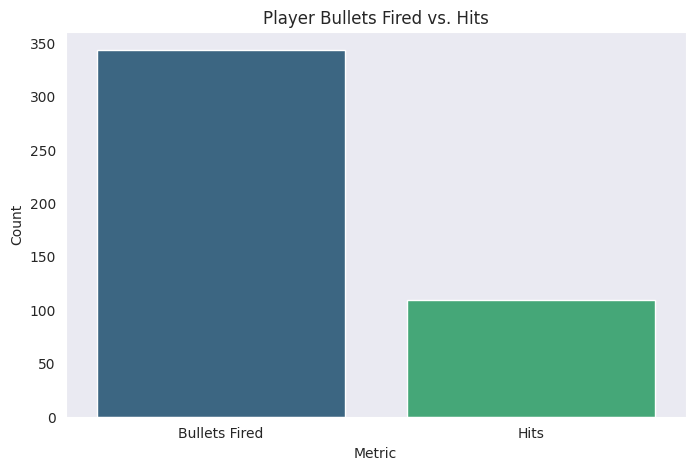

In [6]:
#graph 2 hits vs bullets!!!!1

# Ensure 'Value_numeric' column is available for calculations
# (This was created in a previous cell, but re-adding for self-contained execution if needed)
df['Value_numeric'] = pd.to_numeric(df['Value'], errors='coerce')

# Extract 'Bullets Fired' and 'Hits' metrics
bullets_fired_value = df[df['Metric'] == 'Bullets Fired']['Value_numeric'].iloc[0] if not df[df['Metric'] == 'Bullets Fired'].empty else None
hits_value = df[df['Metric'] == 'Hits']['Value_numeric'].iloc[0] if not df[df['Metric'] == 'Hits'].empty else None

if bullets_fired_value is not None and hits_value is not None:
    # Calculate accuracy
    accuracy = (hits_value / bullets_fired_value) * 100 if bullets_fired_value > 0 else 0
    print(f"Bullets Fired: {bullets_fired_value}")
    print(f"Hits: {hits_value}")
    print(f"Player Accuracy: {accuracy:.2f}%")

    # Create a DataFrame for plotting 'Bullets Fired' and 'Hits'
    metrics_to_plot = pd.DataFrame({
        'Metric': ['Bullets Fired', 'Hits'],
        'Value': [bullets_fired_value, hits_value]
    })

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Metric', y='Value', data=metrics_to_plot, palette='viridis')
    plt.ylabel('Count')
    plt.title('Player Bullets Fired vs. Hits')
    plt.grid(axis='y')
    plt.show()
else:
    print("Could not find 'Bullets Fired' or 'Hits' in the DataFrame to calculate accuracy or plot.")

# Removing the 'Accuracy Over Time' plot as it is not feasible with the current data structure
# (i.e., only a single 'Time Played (sec)' value exists, making a line plot for trend inappropriate).

In [7]:
# 12) Save personal output and provide download link
out_name = "arryan_analysis.csv"
df.to_csv(out_name, index=False)
from google.colab import files
files.download(out_name)
print(f"\nSaved and started download: {out_name}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Saved and started download: arryan_analysis.csv
